In [105]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [106]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [107]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [108]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [109]:



df = getQuotes(frameM30, 2023)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7472,1691424000,1.09953,1.10050,1.09936,1.10023,2476,8,0
7473,1691425800,1.10022,1.10113,1.09911,1.09924,4067,8,0
7474,1691427600,1.09924,1.10049,1.09854,1.10016,3236,8,0
7475,1691429400,1.10015,1.10077,1.09942,1.10014,3675,8,0



## Kaufman's Adapative Moving Average & Calculation Involved

The Kaufman's Adaptive Moving Average (KAMA) is a technical indicator used in financial analysis to reduce the noise in price data and provide a smoother moving average that adapts to market conditions. It is designed to be more responsive during periods of high volatility and less responsive during periods of low volatility. The calculation involves several steps:

- **Efficiency Ratio (ER)** - Calculate the Efficiency Ratio, which measures the consistency of the price movement. It's calculated as the absolute value of the difference between today's price and the price N periods ago, divided by the sum of the absolute differences over the N periods.

```ER = |Close - Close (N periods ago)| / Sum(|Close - Close (1 period ago)|, ..., |Close - Close (N periods ago)|)```

- **Smoothing Constant (SC)** - Calculate the Smoothing Constant, which adjusts the responsiveness of the KAMA. It's derived from the Efficiency Ratio and can be calculated using the following formula:

```SC = (ER * (2 / (fastest period + 1) - 2 / (slowest period + 1)) + 2 / (slowest period + 1))^2```

Here, "fastest period" and "slowest period" refer to the shortest and longest time periods used for calculation, respectively.

- **Fastest and Slowest Periods** - Choose the values for the fastest and slowest periods. These values will depend on your trading strategy and the market you're analyzing.

- **Smoothing Constant Limit** - Set a limit on the Smoothing Constant to prevent extreme values. For example, you can set a maximum value of 0.9 and a minimum value of 0.1 for the Smoothing Constant.

- **Current KAMA** -  Calculate the current KAMA using the previous KAMA value, the Smoothing Constant, and the current price:

```Current KAMA = Previous KAMA + SC * (Price - Previous KAMA)```


Repeat these steps for each period to calculate the KAMA values over time. The initial KAMA value can be based on a simple moving average or any other initial value you choose.

Please note that this is a simplified explanation of the KAMA calculation. In practice, trading platforms and charting software often provide built-in tools to calculate the KAMA and other technical indicators, so you don't need to perform these calculations manually. Always ensure you fully understand the indicator and its application before incorporating it into your trading strategy.


Luckily, **pandas_ta** python library provide a very easy way to calculate Kaufman's Adaptive Moving Average.


In [110]:

shortKamaPeriod = 200
longKamaPeriod = 500

df[f'kama-{shortKamaPeriod}'] = ta.kama(df['close'], length=shortKamaPeriod)
df[f'kama-{longKamaPeriod}'] = ta.kama(df['close'], length=longKamaPeriod)

# Alternatively, you can specify other custom parameters as well like in example given below.
# df['KAMA'] = ta.kama(df['Close'], length=10, fast=2, slow=30)



In [111]:



df = df.dropna()

df = df[500:]

df




,time,open,high,low,close,tick_volume,spread,real_volume,kama-200,kama-500
999,1675107000,1.08614,1.08636,1.08570,1.08573,3774,8,0,1.088078,1.078789
1000,1675108800,1.08574,1.08603,1.08497,1.08555,3606,8,0,1.088066,1.078826
1001,1675110600,1.08554,1.08554,1.08515,1.08541,2614,8,0,1.088052,1.078863
1002,1675112400,1.08542,1.08552,1.08388,1.08417,3697,8,0,1.088030,1.078889
1003,1675114200,1.08417,1.08463,1.08403,1.08458,2788,8,0,1.088007,1.078917
...,...,...,...,...,...,...,...,...,...,...
7472,1691424000,1.09953,1.10050,1.09936,1.10023,2476,8,0,1.096906,1.096969
7473,1691425800,1.10022,1.10113,1.09911,1.09924,4067,8,0,1.096919,1.096989
7474,1691427600,1.09924,1.10049,1.09854,1.10016,3236,8,0,1.096940,1.097016
7475,1691429400,1.10015,1.10077,1.09942,1.10014,3675,8,0,1.096958,1.097042


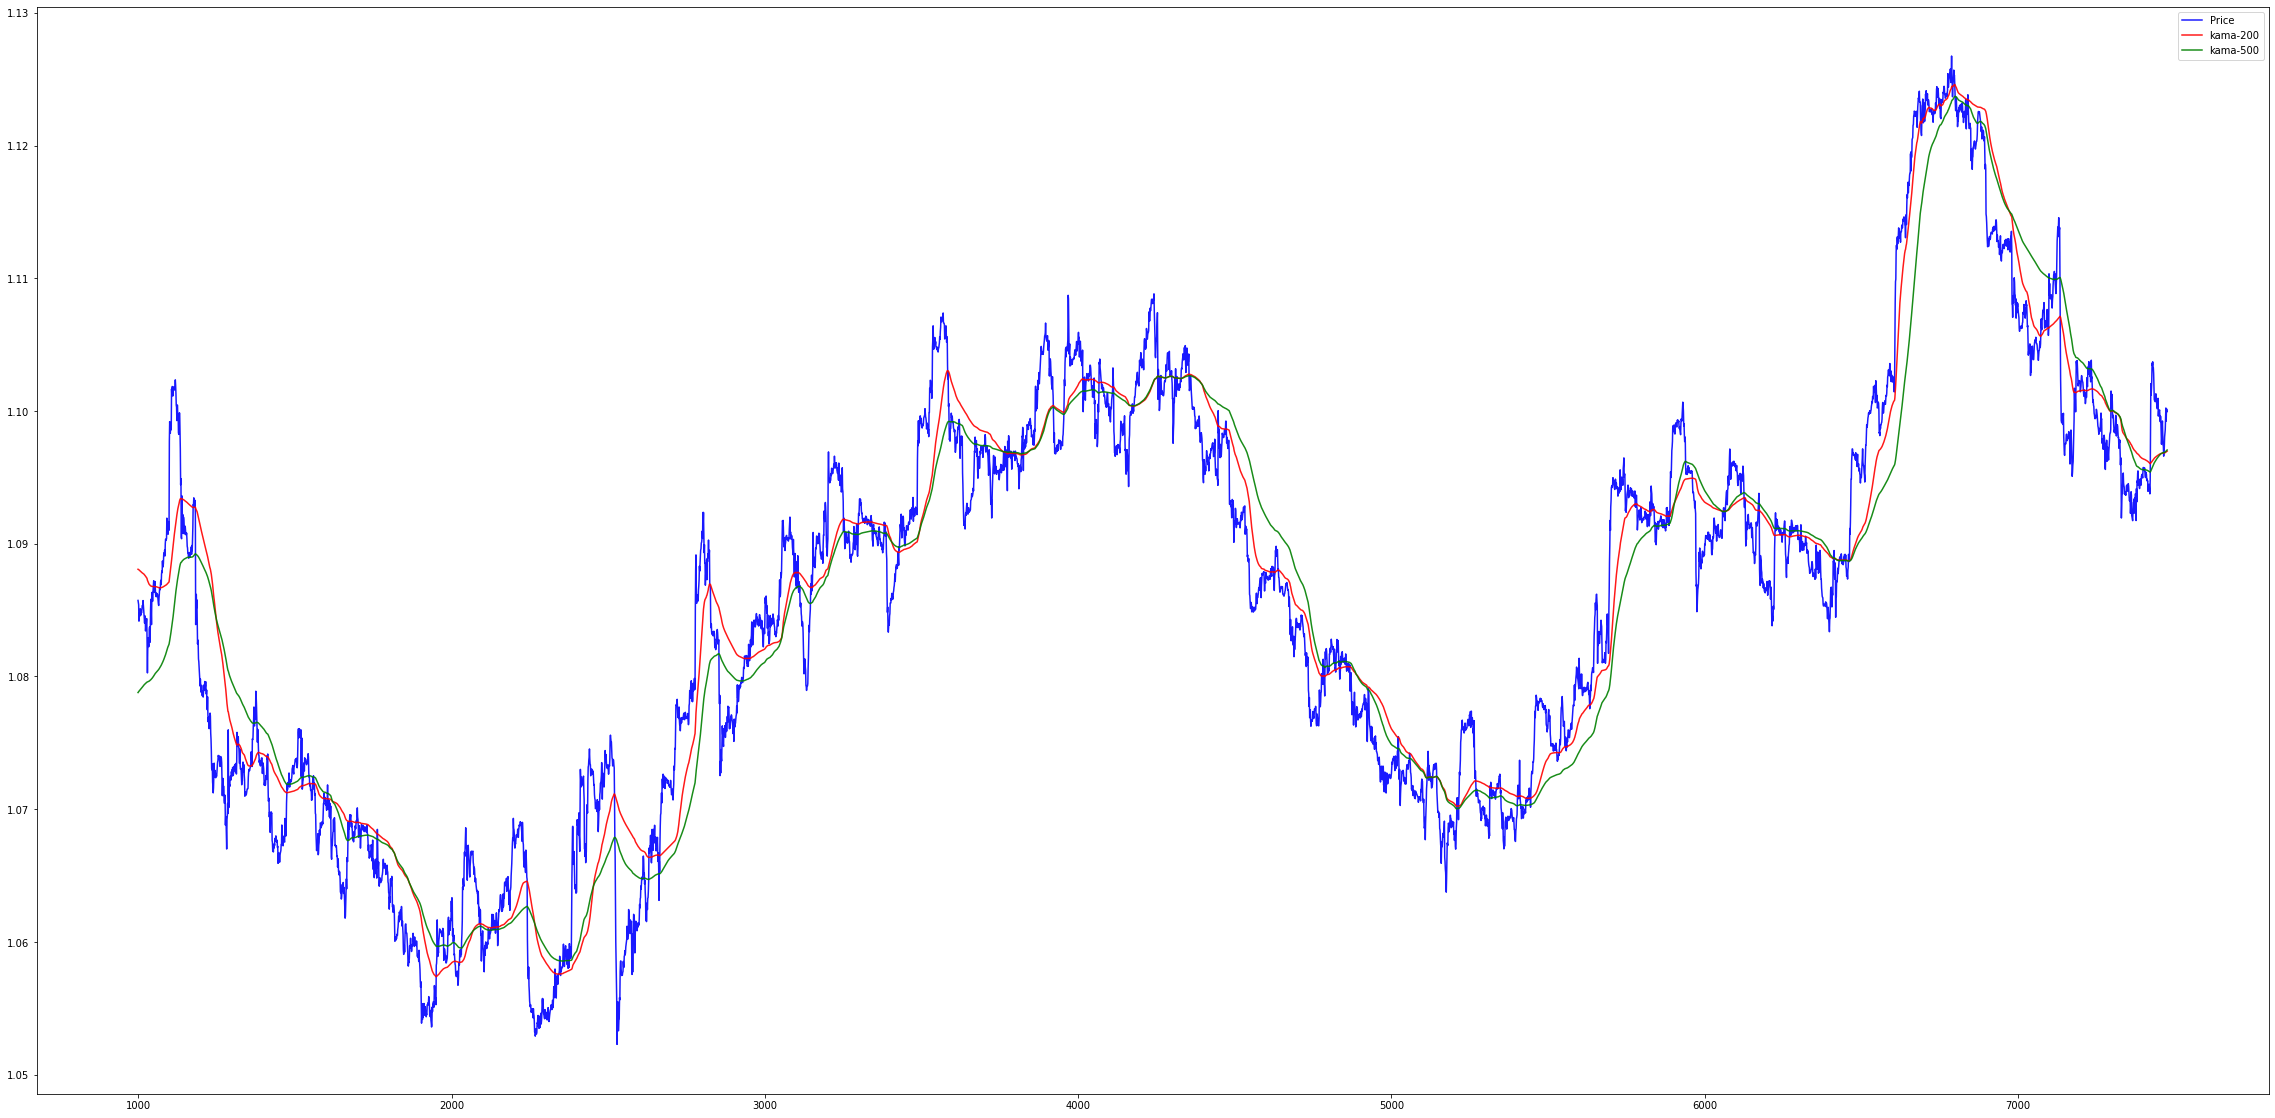

In [112]:




## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

## Plotting the KAMA
plt.plot(df[f'kama-{shortKamaPeriod}'], label=f'kama-{shortKamaPeriod}', c='red', alpha=0.9)
plt.plot(df[f'kama-{longKamaPeriod}'], label=f'kama-{longKamaPeriod}', c='green', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()



